In [1]:
from hifast.core.radec_q import return_radec,get_radec_single,plot_radec,_tight_ra
from hifast.core.radec import get_radec

In [2]:
from hifast.core.radec import plot_radec
import numpy as np

In [115]:
import time
# /DEC+330233-4_2022_07_07_06_35_00_000-radec 
#
# 方式1：
time_start_1 = time.time()

radec = get_radec('A:/KY/DEC+330233-4_2022_07_07_06_35_00_000.xlsx')
time_end_1 = time.time()
print("运行时间："+str(time_end_1 - time_start_1)+"秒")

check A:/KY/DEC+330233-4_2022_07_07_06_35_00_000.xlsx
Use astropy to convert Az, ZD to RA, DEC
atmospheric pressure: 925.0 hPa
ground-level temperature: 15.0 deg C
relative humidity: 0.8
beam 1
beam 2
beam 3
beam 4
beam 5
beam 6
beam 7
beam 8
beam 9
beam 10
beam 11
beam 12
beam 13
beam 14
beam 15
beam 16
beam 17
beam 18
beam 19
运行时间：102.43896651268005秒


In [116]:
ra_min,ra_max,dec_min,dec_max=return_radec(radec)

In [117]:
import matplotlib.pyplot as plt

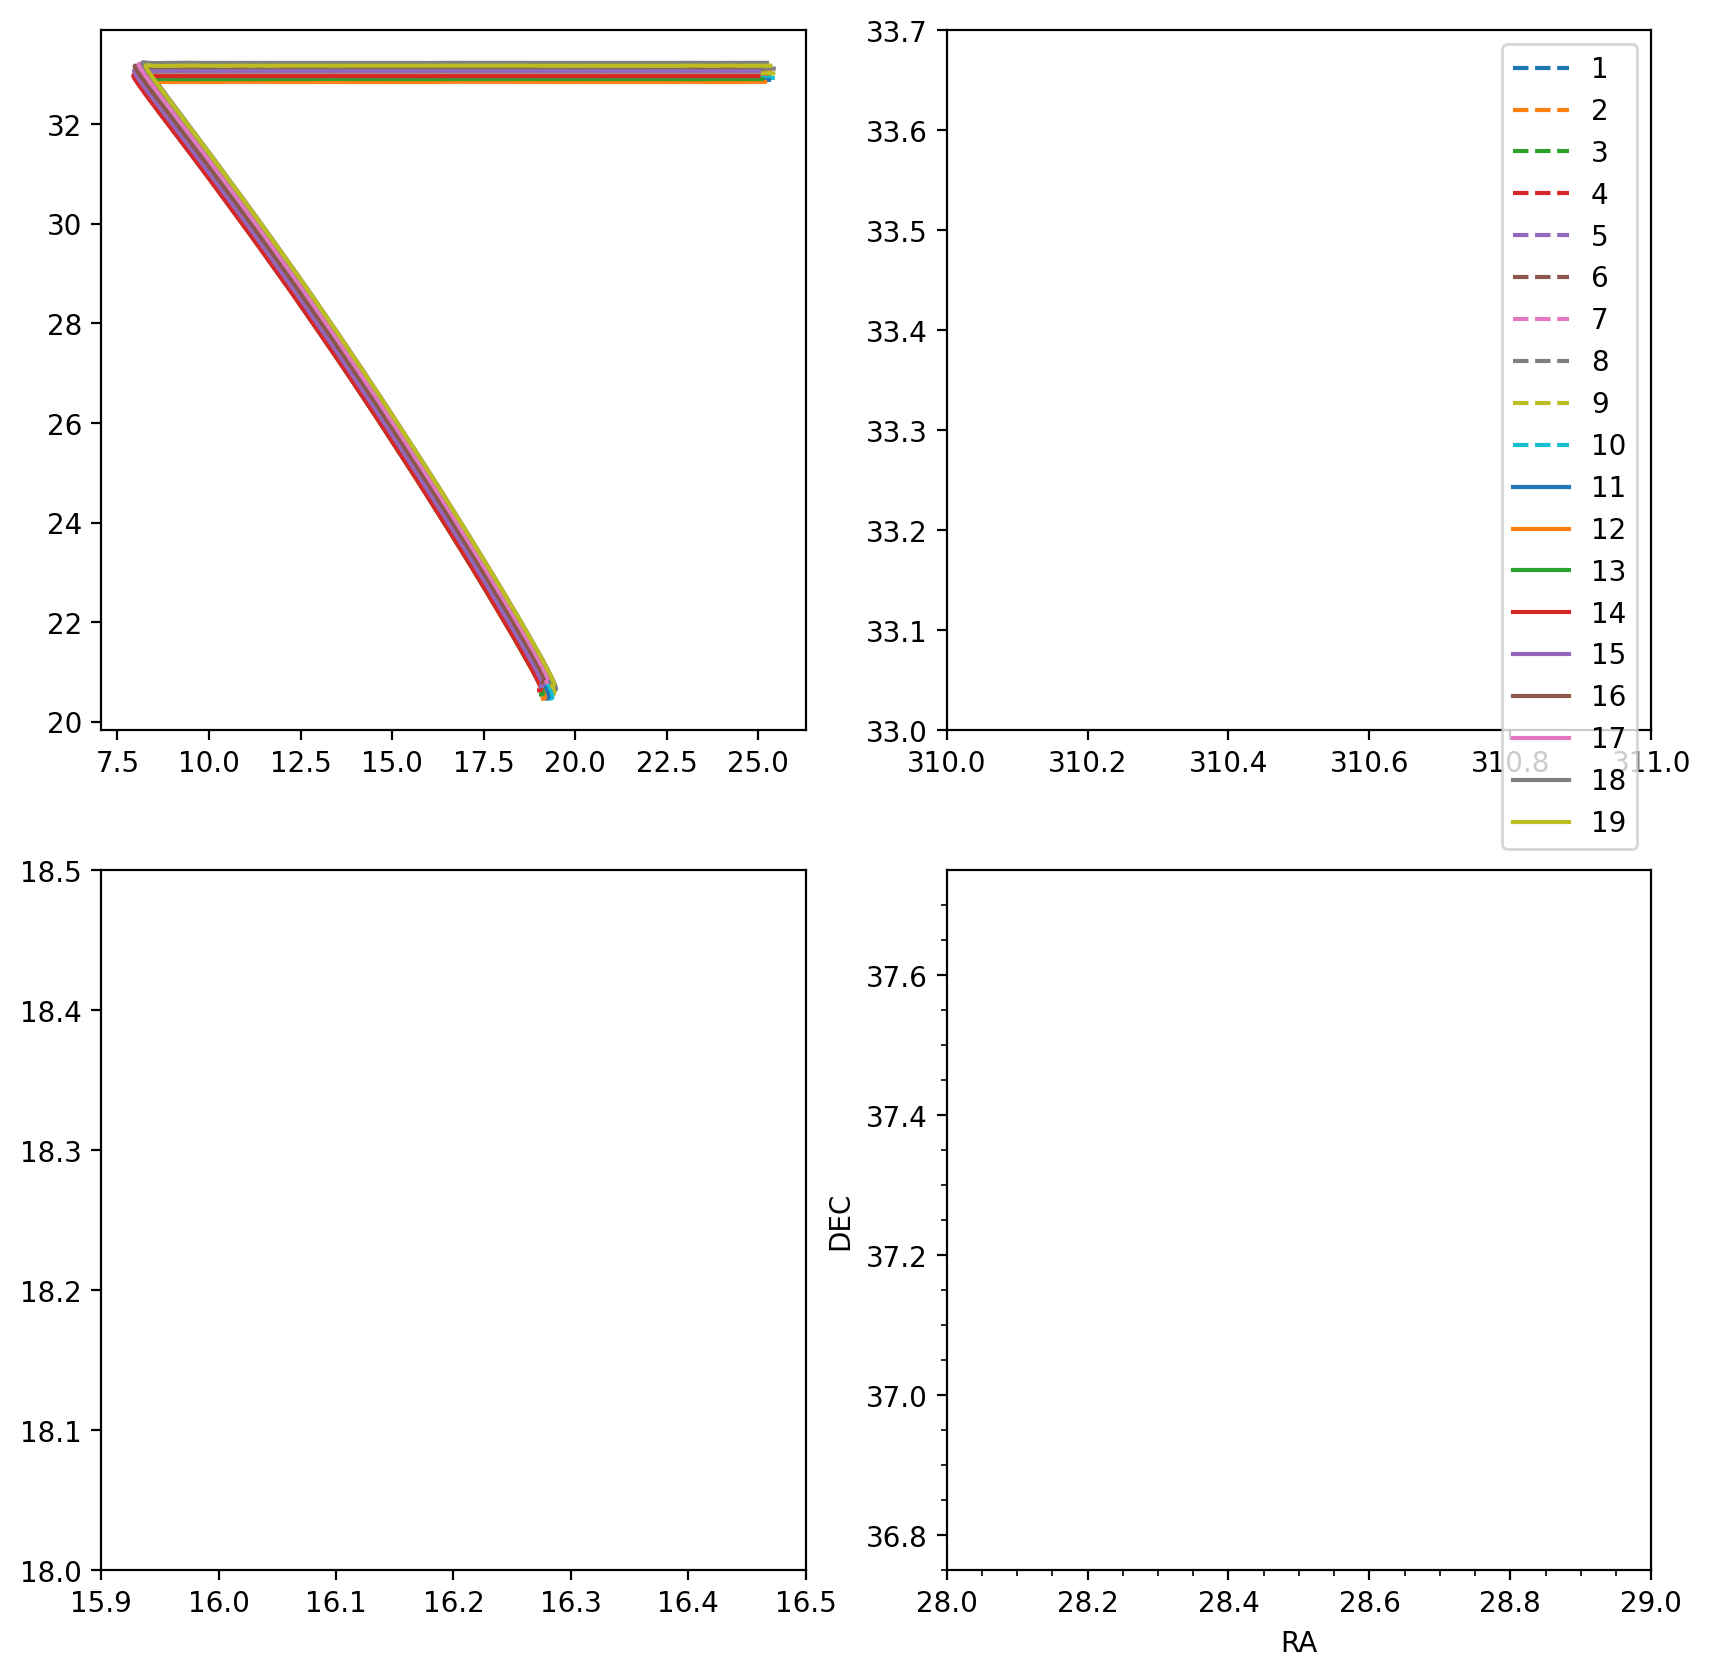

In [118]:
plt.figure(dpi=200,figsize=(10,10))
ax = plt.subplot(221)
ind_sort = np.argsort(radec['mjd'])
for i in range(1,20):
    ax.plot(_tight_ra(radec[f'ra{i}'][ind_sort]), radec[f'dec{i}'][ind_sort])

ax = plt.subplot(222)
ind_sort = np.argsort(radec['mjd'])
for i in range(1,20):
    if i>10:
        strs='-'
    else:
        strs='--'#'dotted'
    ax.plot(_tight_ra(radec[f'ra{i}'][ind_sort]), radec[f'dec{i}'][ind_sort],label=i,linestyle=strs)
    # 传入主颜色参数
    # sns.palplot(sns.color_palette("rainbow",n_colors=10))

    plt.legend()
plt.xlim(310,311)
plt.ylim(33,33.7)
    
ax = plt.subplot(223)
ind_sort = np.argsort(radec['mjd'])
for i in range(1,20):
    ax.plot(_tight_ra(radec[f'ra{i}'][ind_sort]), radec[f'dec{i}'][ind_sort])
plt.xlim(15.9,16.5)
plt.ylim(18,18.5)
    
ax = plt.subplot(224)
ind_sort = np.argsort(radec['mjd'])
for i in range(1,20):
    ax.plot(_tight_ra(radec[f'ra{i}'][ind_sort]), radec[f'dec{i}'][ind_sort])
plt.xlim(28,29)
plt.ylim(36.75,37.75)
    
    
ax.set_xlabel('RA')
ax.set_ylabel('DEC')
ax.minorticks_on()

In [140]:
rdrange

array([ 8.14621451, 25.2112546 , 32.85375222, 33.23402203])

In [120]:
ra1=_tight_ra(radec[f'ra{1}'][ind_sort])
dec1=radec[f'dec{1}'][ind_sort]

In [121]:
ra1.shape

(21441,)

In [122]:
import numpy as np

def moving_average(x, n):
    '''
    x: 原始数据
    n: 窗口大小
    '''
    weights = np.ones(n) / n
    return np.convolve(x, weights, mode='same')


-536


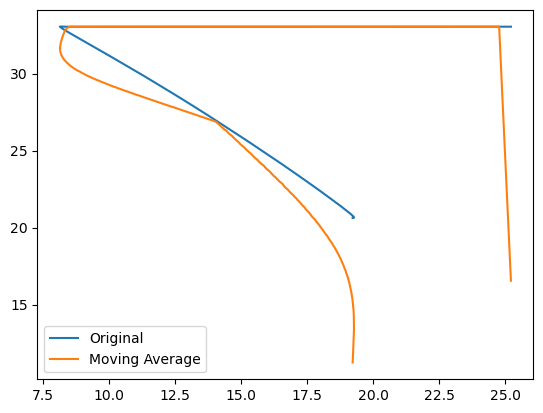

In [123]:
import matplotlib.pyplot as plt

# 生成随机数据
# x = np.linspace(0, 10, 100)
# y = np.sin(x) + np.random.normal(0, 0.1, 100)

x=ra1.copy()
y=dec1.copy()


# t必须为奇数
t=len(x)//20
# 计算移动平均值
ma_y = moving_average(y, t)
ma_x=x[t//2:-(t//2)]
# ma_y[0:t//2]=0
# ma_y[-t//2:-1]=0
print(-t//2)
# 绘制图像
plt.plot(x, y, label='Original')
plt.plot(x, ma_y, label='Moving Average')

# plt.xlim(30,40)
# plt.ylim(37.15,37.58)
plt.legend()
plt.show()


(-2.0, 5.0)

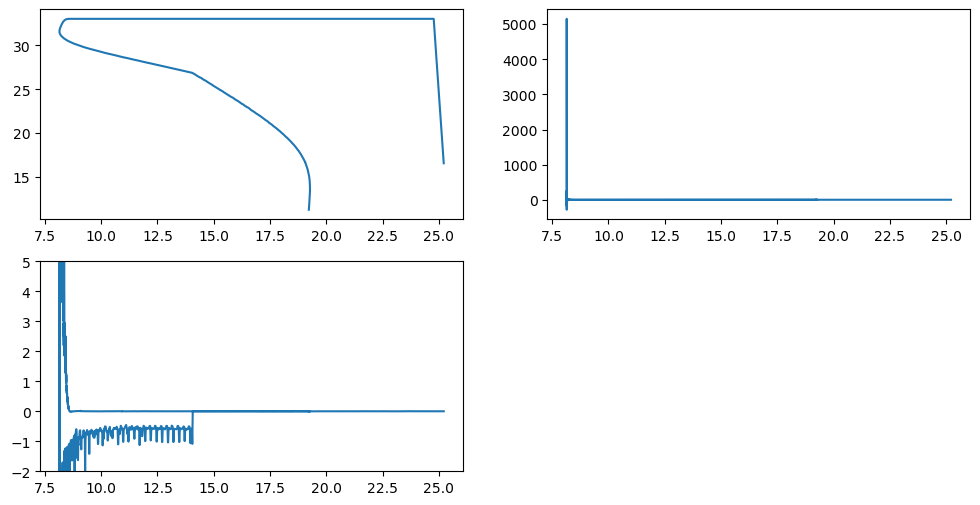

In [124]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

# 生成数据
x = ra1
y = dec1
plt.figure(figsize=(12,6))
plt.subplot(221)
# 插值
# f = interp1d(x, y, kind='cubic')
# xnew = ra1
# ynew = f(xnew)

# 绘制原始函数和插值函数
# plt.plot(x, y, 'o', xnew, ynew, '-')
plt.plot(x,ma_y)
# 计算一阶导数
# dydx = np.gradient(ynew, xnew)
dydx = np.gradient(ma_y, x)


dydx[0:t//2]=0
dydx[-t//2:-1]=0
dydx[-1]=0
# 绘制一阶导数
plt.subplot(222)
plt.plot(x, dydx)
plt.subplot(223)
plt.plot(x,dydx)
plt.ylim((-2,5))

In [125]:
np.argmin(dydx)

990

In [126]:
np.argmax(dydx)

997

In [127]:
# index1=np.max((np.argmin(dydx),np.argmax(dydx)))
index1=np.argmax(dydx)
index1
#最小

997

In [128]:
index2=np.max(len(x))
index2
#最大

21441

In [129]:
dydx.shape

(21441,)

In [130]:
dydx[index1]

5154.878484223038

In [131]:
index3=index1+(index2-index1)//3
index3

7811

In [132]:
index4=index1+2*(index2-index1)//3
index4

14626

In [133]:
ramin=x[index1]
ramax=x[index2-1]

In [134]:
ramin

8.1462145120905

In [135]:
ramax

25.211254602871673

In [136]:
dec12=radec[f'dec{12}'][ind_sort]
dec18=radec[f'dec{18}'][ind_sort]

In [137]:
decmin=np.average(dec12[index3:index4])
decmin

32.853752220685756

In [138]:
decmax=np.average(dec18[index3:index4])
decmax

33.23402202732944

In [139]:
rdrange=np.array([ramin,ramax,decmin,decmax])

In [100]:
# 取 argmin 与末尾的中点的max和min值,取 argmin 为最小,

(-2.0, 5.0)

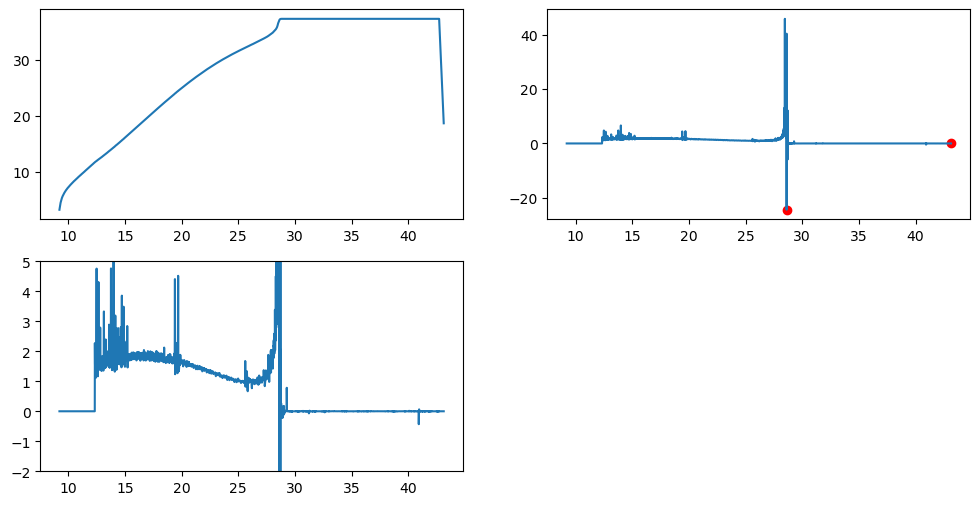

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

# 生成数据
x = ra1
y = dec1
plt.figure(figsize=(12,6))
plt.subplot(221)
# 插值
# f = interp1d(x, y, kind='cubic')
# xnew = ra1
# ynew = f(xnew)

# 绘制原始函数和插值函数
# plt.plot(x, y, 'o', xnew, ynew, '-')
plt.plot(x,ma_y)
# 计算一阶导数
# dydx = np.gradient(ynew, xnew)
dydx = np.gradient(ma_y, x)


dydx[0:t//2]=0
dydx[-t//2:-1]=0
dydx[-1]=0
# 绘制一阶导数
plt.subplot(222)
plt.plot(x, dydx)
plt.scatter(x[index1],dydx[index1],c='red')
plt.scatter(x[index2-1],dydx[index2-1],c='red')
plt.subplot(223)
plt.plot(x,dydx)
plt.ylim((-2,5))
#点的密度不同 

In [28]:
x

array([ 9.21232239,  9.21314827,  9.21404189, ..., 43.12104697,
       43.12185433, 43.12268341])

(-2.0, 5.0)

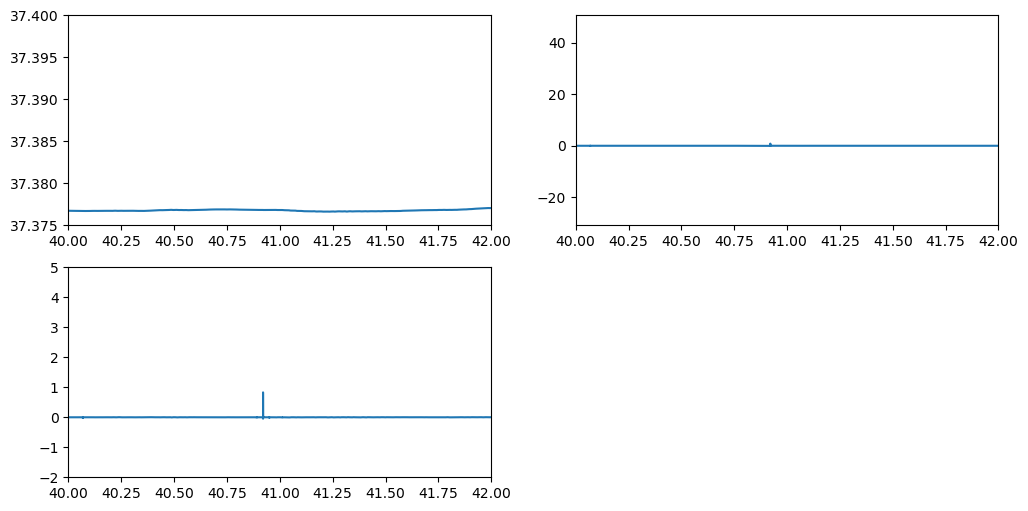

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

# 生成数据
x = ra1
y = dec1
plt.figure(figsize=(12,6))
plt.subplot(221)
# 插值
# f = interp1d(x, y, kind='cubic')
# xnew = ra1
# ynew = f(xnew)

# 绘制原始函数和插值函数
# plt.plot(x, y, 'o', xnew, ynew, '-')
plt.plot(ma_x,ma_y)
plt.xlim((40,42))
plt.ylim(37.375,37.4)
# 计算一阶导数
# dydx = np.gradient(ynew, xnew)
dydx = np.gradient(ma_y, ma_x)
# 绘制一阶导数
plt.subplot(222)
plt.xlim((40,42))
plt.plot(ma_x, dydx)
plt.subplot(223)
plt.xlim((40,42))
plt.plot(ma_x,dydx)
plt.ylim((-2,5))

In [61]:
import numpy as np

def moving_average(data, n):
    # 定义一个长度为n的平均值卷积核
    kernel = np.ones(n) / n
    # 使用卷积操作对数据进行平滑处理
    smoothed_data = np.convolve(data, kernel, mode='valid')
    return smoothed_data
dec1_smooth=moving_average(dec1,100)

ValueError: operands could not be broadcast together with shapes (19308,) (19209,) 

(-2.0, 5.0)

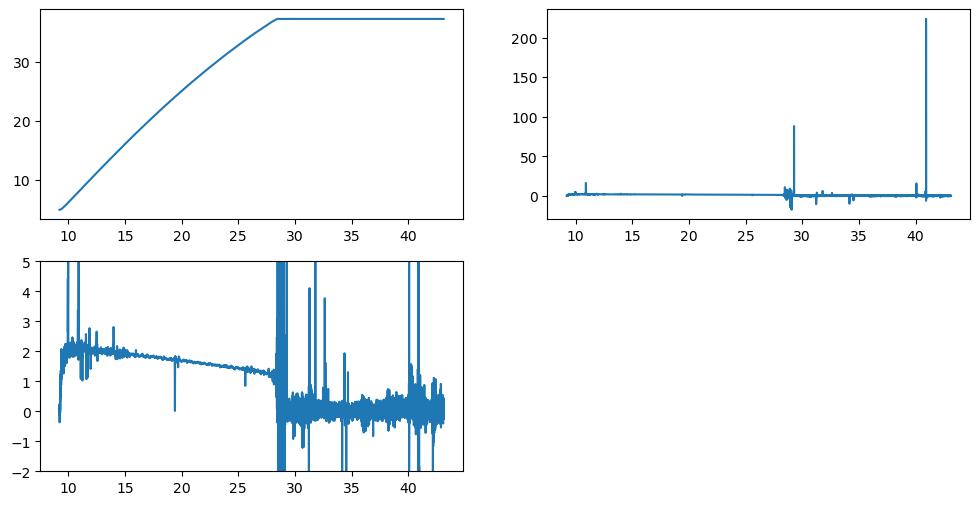

In [54]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

# 生成数据
x = ra1
y = dec1
plt.figure(figsize=(12,6))
plt.subplot(221)
# 插值
# f = interp1d(x, y, kind='cubic')
# xnew = ra1
# ynew = f(xnew)

# 绘制原始函数和插值函数
# plt.plot(x, y, 'o', xnew, ynew, '-')
plt.plot(x,y)
# 计算一阶导数
# dydx = np.gradient(ynew, xnew)
dydx = np.gradient(y, x)
# 绘制一阶导数
plt.subplot(222)
plt.plot(x, dydx)
plt.subplot(223)
plt.plot(x,dydx)
plt.ylim((-2,5))
# plt.legend(['data', 'gradient'], loc='best')
# plt.show()


(18.0, 18.5)

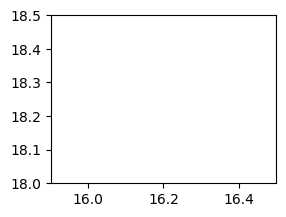

In [50]:
ax = plt.subplot(111)
ind_sort = np.argsort(radec['mjd'])
for i in range(1,20):
    ax.plot(_tight_ra(radec[f'ra{i}'][ind_sort]), radec[f'dec{i}'][ind_sort])
plt.xlim(16.1,16.2)
plt.ylim(18,18.5)

In [ ]:
np.savetxt()

In [ ]:
_tight_ra(radec[f'ra{i}'][ind_sort]), radec[f'dec{i}'][ind_sort]

In [65]:
import time


time_start_1 = time.time()
#####  
radec = get_radec('A:/KY/DEC+334554-2_2022_06_28_04_39_02_000.xlsx')
time_end_1 = time.time()
print("运行时间："+str(time_end_1 - time_start_1)+"秒")

check A:/KY/DEC+334554-2_2022_06_28_04_39_02_000.xlsx
Use astropy to convert Az, ZD to RA, DEC
atmospheric pressure: 925.0 hPa
ground-level temperature: 15.0 deg C
relative humidity: 0.8
beam 1
beam 2
beam 3
beam 4
beam 5
beam 6
beam 7
beam 8
beam 9
beam 10
beam 11
beam 12
beam 13
beam 14
beam 15
beam 16
beam 17
beam 18
beam 19
运行时间：466.00259280204773秒


In [ ]:
ra_min,ra_max,dec_min,dec_max=return_radec(radec)

In [14]:
import matplotlib.pyplot as plt

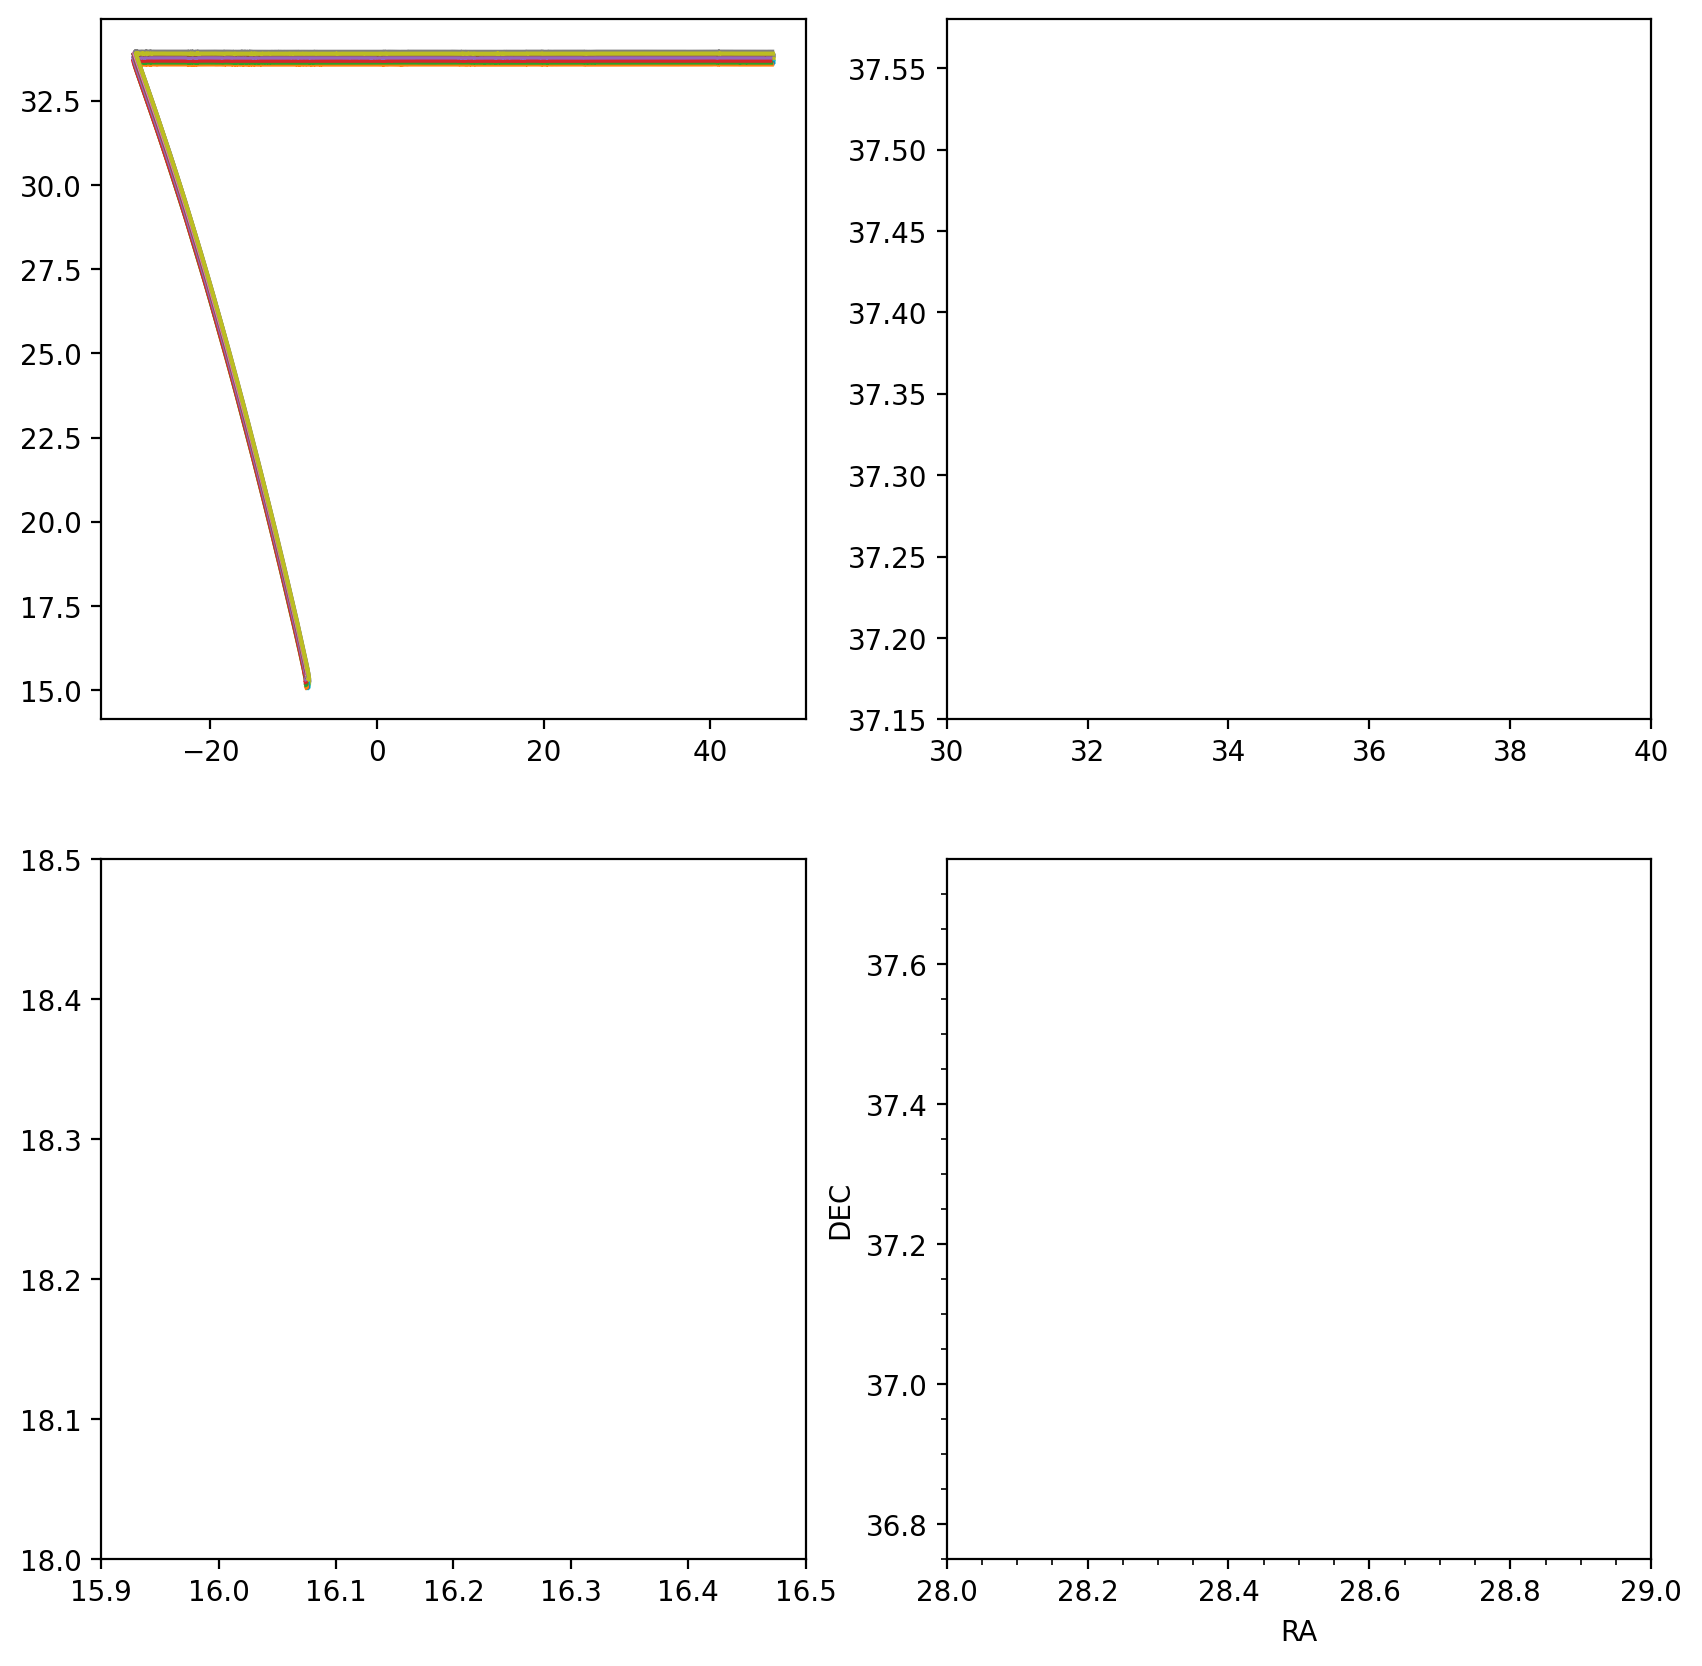

In [51]:
plt.figure(dpi=200,figsize=(10,10))
ax = plt.subplot(221)
ind_sort = np.argsort(radec['mjd'])
for i in range(1,20):
    ax.plot(_tight_ra(radec[f'ra{i}'][ind_sort]), radec[f'dec{i}'][ind_sort])

ax = plt.subplot(222)
ind_sort = np.argsort(radec['mjd'])
for i in range(1,20):
    ax.plot(_tight_ra(radec[f'ra{i}'][ind_sort]), radec[f'dec{i}'][ind_sort])
plt.xlim(30,40)
plt.ylim(37.15,37.58)
    
ax = plt.subplot(223)
ind_sort = np.argsort(radec['mjd'])
for i in range(1,20):
    ax.plot(_tight_ra(radec[f'ra{i}'][ind_sort]), radec[f'dec{i}'][ind_sort])
plt.xlim(15.9,16.5)
plt.ylim(18,18.5)
    
ax = plt.subplot(224)
ind_sort = np.argsort(radec['mjd'])
for i in range(1,20):
    ax.plot(_tight_ra(radec[f'ra{i}'][ind_sort]), radec[f'dec{i}'][ind_sort])
plt.xlim(28,29)
plt.ylim(36.75,37.75)
    
    
ax.set_xlabel('RA')
ax.set_ylabel('DEC')
ax.minorticks_on()

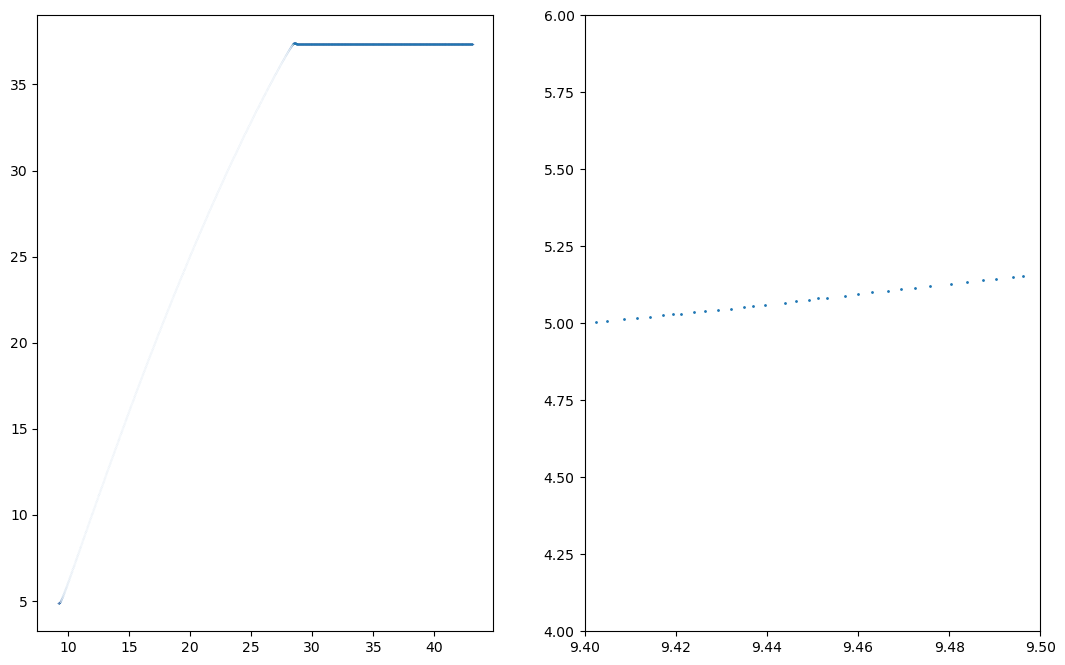

In [41]:
plt.figure(dpi=100,figsize=(20,8))
ax = plt.subplot(131)
ind_sort = np.argsort(radec['mjd'])
for i in range(1,2):
    ax.scatter(_tight_ra(radec[f'ra{i}'][ind_sort]), radec[f'dec{i}'][ind_sort],s=0.0001)
    
ax = plt.subplot(132)
ind_sort = np.argsort(radec['mjd'])
for i in range(1,2):
    ax.scatter(_tight_ra(radec[f'ra{i}'][ind_sort]), radec[f'dec{i}'][ind_sort],s=1)
    plt.xlim((9.4,9.5))
    plt.ylim((4,6))

In [63]:
ra=_tight_ra(radec[f'ra{1}'][ind_sort])
dec=radec[f'dec{1}'][ind_sort]

(-2.0, 5.0)

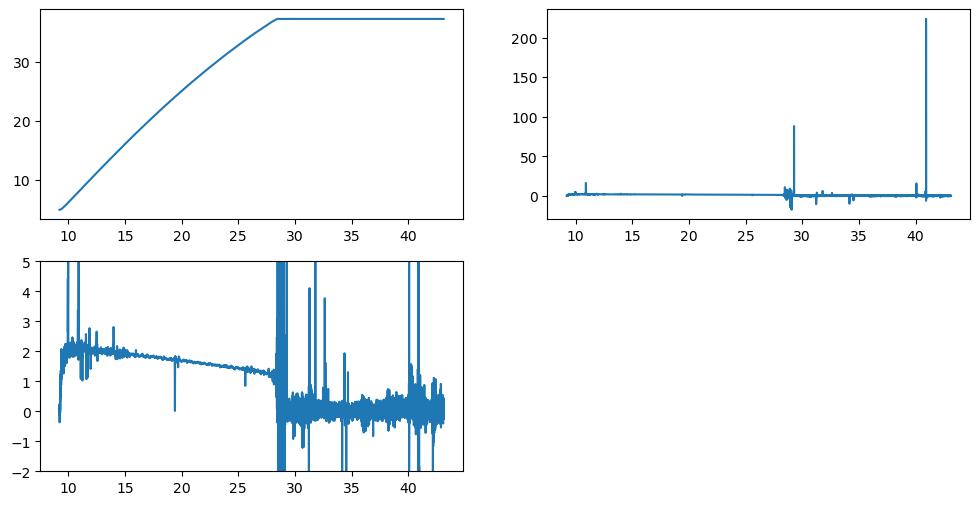

In [64]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

# 生成数据
x = ra
y = dec
plt.figure(figsize=(12,6))
plt.subplot(221)
# 插值
# f = interp1d(x, y, kind='cubic')
# xnew = ra1
# ynew = f(xnew)

# 绘制原始函数和插值函数
# plt.plot(x, y, 'o', xnew, ynew, '-')
plt.plot(x,y)
# 计算一阶导数
# dydx = np.gradient(ynew, xnew)
dydx = np.gradient(y, x)
# 绘制一阶导数
plt.subplot(222)
plt.plot(x, dydx)
plt.subplot(223)
plt.plot(x,dydx)
plt.ylim((-2,5))
# plt.legend(['data', 'gradient'], loc='best')
# plt.show()
